# Kmeans clustering

Utilizing a customer database consisting of annual income and spending score, find the clusters k number of clusters of costumers based on their shopping trends


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/Users/mmichalski/dev/ml/my_ml_projects/data/customer_data.csv'
df = pd.read_csv(data_path)

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


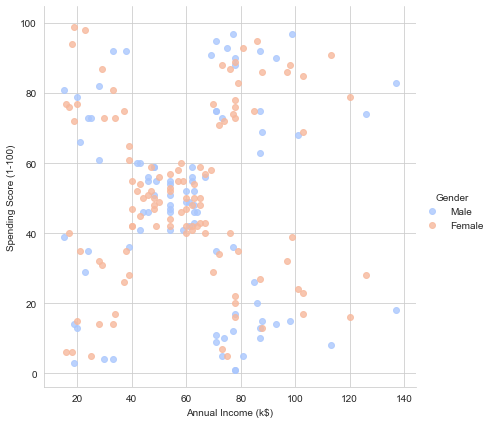

In [22]:
# take a look at the data distribution as it relates to income/spending score and gender
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df, hue='Gender',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [4]:
# Utilize income and spending score as input features
X = df.iloc[:, [3,4]].values



In [13]:
from sklearn.cluster import KMeans
wcss=[]

#Let's try KMeans with up to 20 clusters
for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    #inertia_ is the formula used to segregate the data points into clusters
    


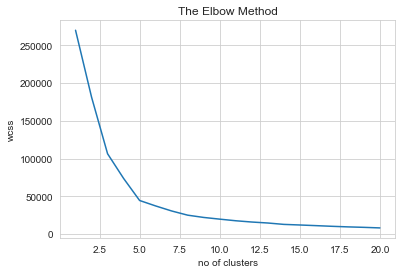

In [12]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
# Judging by the elblow curve, ideal number of clusters seems to be 5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

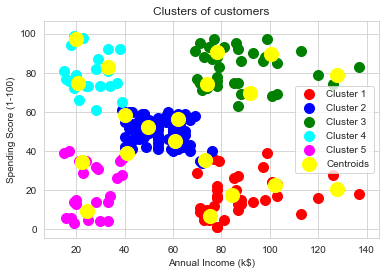

In [20]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [42]:
# Try adding Gender feature to see if we get more clusters
# Utilize gender, income, and spending score as input features

# normalize gender to 1/0 0 male, 1 female
gender_map = {'Female': 1, 'Male': 0}
df['Gender'] = df['Gender'].map(gender_map)


X = df.iloc[:, [2,3,4]].values
wcss=[]

#Let's try KMeans with up to 10 clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    #inertia_ is the formula used to segregate the data points into clusters


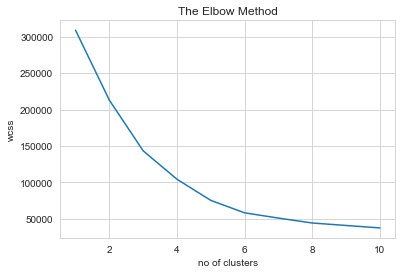

In [43]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()



In [44]:
# Judging by the elblow curve, ideal number of clusters seems to be 5

#Model Build
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

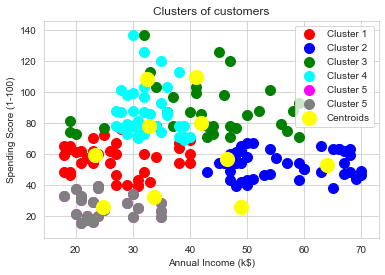

In [45]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'gray', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Final thoughts

Giving this limited data, it seems that only two features of annual income and spending score create well balanced five clusters with centroids that seems to align. Addind age/or gender created more imbalanced clusters